In [ ]:
import numpy as np

# 加载数据
black_data = np.load('plot2_noisy_1/black_region_noisy.npy')  # 黑色区域
red_data = np.load('plot2_noisy_1/red_region_noisy.npy')      # 红色区域

# 提取坐标
black_x = black_data[0, :]
black_y = black_data[1, :]
red_x = red_data[0, :]
red_y = red_data[1, :]

# 创建特征数组 (x, y) 和标签数组 target
black_features = np.column_stack((black_x, black_y))  # 黑色特征
red_features = np.column_stack((red_x, red_y))       # 红色特征

black_target = np.zeros((black_features.shape[0],), dtype=int)  # 黑色标签：0
red_target = np.ones((red_features.shape[0],), dtype=int)       # 红色标签：1

# 合并特征和标签
features = np.vstack((black_features, red_features))  # 合并所有特征
targets = np.hstack((black_target, red_target))       # 合并所有标签

# 打乱数据
np.random.seed(42)  # 设置随机种子，确保结果可复现
indices = np.arange(features.shape[0])  # 生成索引
np.random.shuffle(indices)  # 打乱索引

features = features[indices]  # 按打乱后的索引重排特征
targets = targets[indices]    # 按打乱后的索引重排标签

# 保存打乱后的特征和标签数组
np.save('plot2_noisy_1/features.npy', features)  # 保存打乱的特征数组
np.save('plot2_noisy_1/targets.npy', targets)    # 保存打乱的标签数组

# 打印数组形状验证
print("打乱后的特征数组形状：", features.shape)  # (11000, 2)
print("打乱后的标签数组形状：", targets.shape)   # (11000,)
print("前5个特征：\n", features[:5])
print("前5个标签：", targets[:5])


In [ ]:
import numpy as np

# 加载数据
black_data_test = np.load('plot2_noisy_1/black_region_noisy_test.npy')  # 黑色区域
red_data_test = np.load('plot2_noisy_1/red_region_noisy_test.npy')      # 红色区域

# 提取坐标
black_x_test = black_data_test[0, :]
black_y_test = black_data_test[1, :]
red_x_test = red_data_test[0, :]
red_y_test = red_data_test[1, :]

# 创建特征数组 (x, y) 和标签数组 target
black_features_test = np.column_stack((black_x_test, black_y_test))  # 黑色特征
red_features_test = np.column_stack((red_x_test, red_y_test))       # 红色特征

black_target_test = np.zeros((black_features_test.shape[0],), dtype=int)  # 黑色标签：0
red_target_test = np.ones((red_features_test.shape[0],), dtype=int)       # 红色标签：1

# 合并特征和标签
features_test = np.vstack((black_features_test, red_features_test))  # 合并所有特征
targets_test = np.hstack((black_target_test, red_target_test))       # 合并所有标签

# 打乱数据
np.random.seed(42)  # 设置随机种子，确保结果可复现
indices = np.arange(features_test.shape[0])  # 生成索引
np.random.shuffle(indices)  # 打乱索引

features_test = features_test[indices]  # 按打乱后的索引重排特征
targets_test = targets_test[indices]    # 按打乱后的索引重排标签

# 保存打乱后的特征和标签数组
np.save('plot2_noisy_1/features_test.npy', features_test)  # 保存打乱的特征数组
np.save('plot2_noisy_1/targets_test.npy', targets_test)    # 保存打乱的标签数组

# 打印数组形状验证
print("打乱后的特征数组形状：", features_test.shape)  # (11000, 2)
print("打乱后的标签数组形状：", targets_test.shape)   # (11000,)
print("前5个特征：\n", features_test[:5])
print("前5个标签：", targets_test[:5])


In [ ]:
from imbens.metrics import *
from sklearn.metrics import *
from imbens.ensemble import *
from UADF import UncertaintyAwareDeepForest
from demo import get_config
import numpy as np
import matplotlib.pyplot as plt


X = np.load('plot2_noisy_1/features.npy')
y = np.load('plot2_noisy_1/targets.npy')

X_test = np.load('plot2_noisy_1/features_test.npy')
y_test = np.load('plot2_noisy_1/targets_test.npy')

# 绘制分布图，使用布尔索引直接分类
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='black', s=1, label='Black Region (target=0)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=1, label='Red Region (target=1)')
plt.title("Feature Distribution with Targets")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.axis("equal")  # 保持坐标比例一致
plt.show()



In [ ]:
import os
# 配置输出文件夹
output_dir = "plot2_noisy_1"
os.makedirs(output_dir, exist_ok=True)

for method_name, model in {'UncertaintyAwareDeepForest': UncertaintyAwareDeepForest(get_config())}.items():
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")
    
    
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)

    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制结果
    plt.figure(figsize=(6, 6))
    plt.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    plt.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    plt.title(f"{method_name} - Predicted Red and Misclassified Red")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.axis("equal")  # 保持坐标轴比例一致
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np
import os
from imbens.ensemble import *
from catboost import CatBoostClassifier

# 配置输出文件夹
output_dir = "plot2_noisy_1"
os.makedirs(output_dir, exist_ok=True)

# 配置不平衡数据处理模型
ensemble_methods = {
    # 'BalanceCascade': BalanceCascadeClassifier(n_estimators=50),  # 设置生成50棵树
    # 'SelfPacedEnsemble': SelfPacedEnsembleClassifier(n_estimators=50),
    # 'UnderBagging': UnderBaggingClassifier(n_estimators=50),
    # 'EasyEnsemble': EasyEnsembleClassifier(n_estimators=50),
    'RUSBoost': RUSBoostClassifier(n_estimators=50),
    # 'BalancedRandomForest': BalancedRandomForestClassifier(n_estimators=50),
    # 'AdaCost': AdaCostClassifier(n_estimators=50),
    # 'AdaUBoost': AdaUBoostClassifier(n_estimators=50),
    # 'AsymBoost': AsymBoostClassifier(n_estimators=50),
    # 'CatBoost': CatBoostClassifier(n_estimators=50, verbose=0),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")

    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)

    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5)   # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

    # 保存图像
    plt.savefig(os.path.join(output_dir, f"{method_name}_prediction.png"), dpi=300, bbox_inches='tight')

# 统一调整布局
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import os

# 配置输出文件夹
output_dir = "plot2_noisy_1"
os.makedirs(output_dir, exist_ok=True)
# 配置不平衡数据处理模型
ensemble_methods = {
    'OverBagging': OverBaggingClassifier(n_estimators=50),
    'SMOTEBoost': SMOTEBoostClassifier(n_estimators=50),
    'OverBoost': OverBoostClassifier(n_estimators=50),
    'KmeansSMOTEBoost': KmeansSMOTEBoostClassifier(n_estimators=50),
    'SMOTEBagging': SMOTEBaggingClassifier(n_estimators=50),
}

n_models = len(ensemble_methods)  # 模型数量
fig, axes = plt.subplots(1, n_models, figsize=(15, 3))  # 1行n列子图，统一绘制

for idx, (method_name, model) in enumerate(ensemble_methods.items()):
    print(f"Training {method_name}...")
    model.fit(X, y)

    # 预测
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    aupr = average_precision_score(y_test, y_pred_proba[:, 1])
    sen = recall_score(y_test, y_pred)
    spe = specificity_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    print(f"{method_name} - Accuracy: {acc:.4f}")
    print(f"{method_name} - AUC: {auc:.4f}")
    print(f"{method_name} - AUPR: {aupr:.4f}")
    print(f"{method_name} - Sensitivity: {sen:.4f}")
    print(f"{method_name} - Specificity: {spe:.4f}")
    print(f"{method_name} - G-Mean: {gmean:.4f}")
    print(f"{method_name} - F1 Macro: {f1_macro:.4f}")
    
    # 保存预测结果
    np.save(os.path.join(output_dir, f"{method_name}_y_pred.npy"), y_pred)
    np.save(os.path.join(output_dir, f"{method_name}_y_pred_proba.npy"), y_pred_proba)
    
    # 找到预测为红色的点
    predicted_red = X_test[y_pred == 1]

    # 找到将红色点预测错误的点 (真实标签为1，但预测为0)
    misclassified_red = X_test[(y_test == 1) & (y_pred == 0)]

    # 绘制到对应子图
    ax = axes[idx]
    ax.scatter(predicted_red[:, 0], predicted_red[:, 1], c='red', s=5, alpha=0.5)  # 预测为红色的点
    ax.scatter(misclassified_red[:, 0], misclassified_red[:, 1], c='black', s=5, label="Misclassified")  # 误分类的红色点
    ax.set_title(method_name, fontsize=10)
    ax.axis("off")  # 关闭坐标轴

# 统一调整布局
plt.tight_layout()
plt.show()


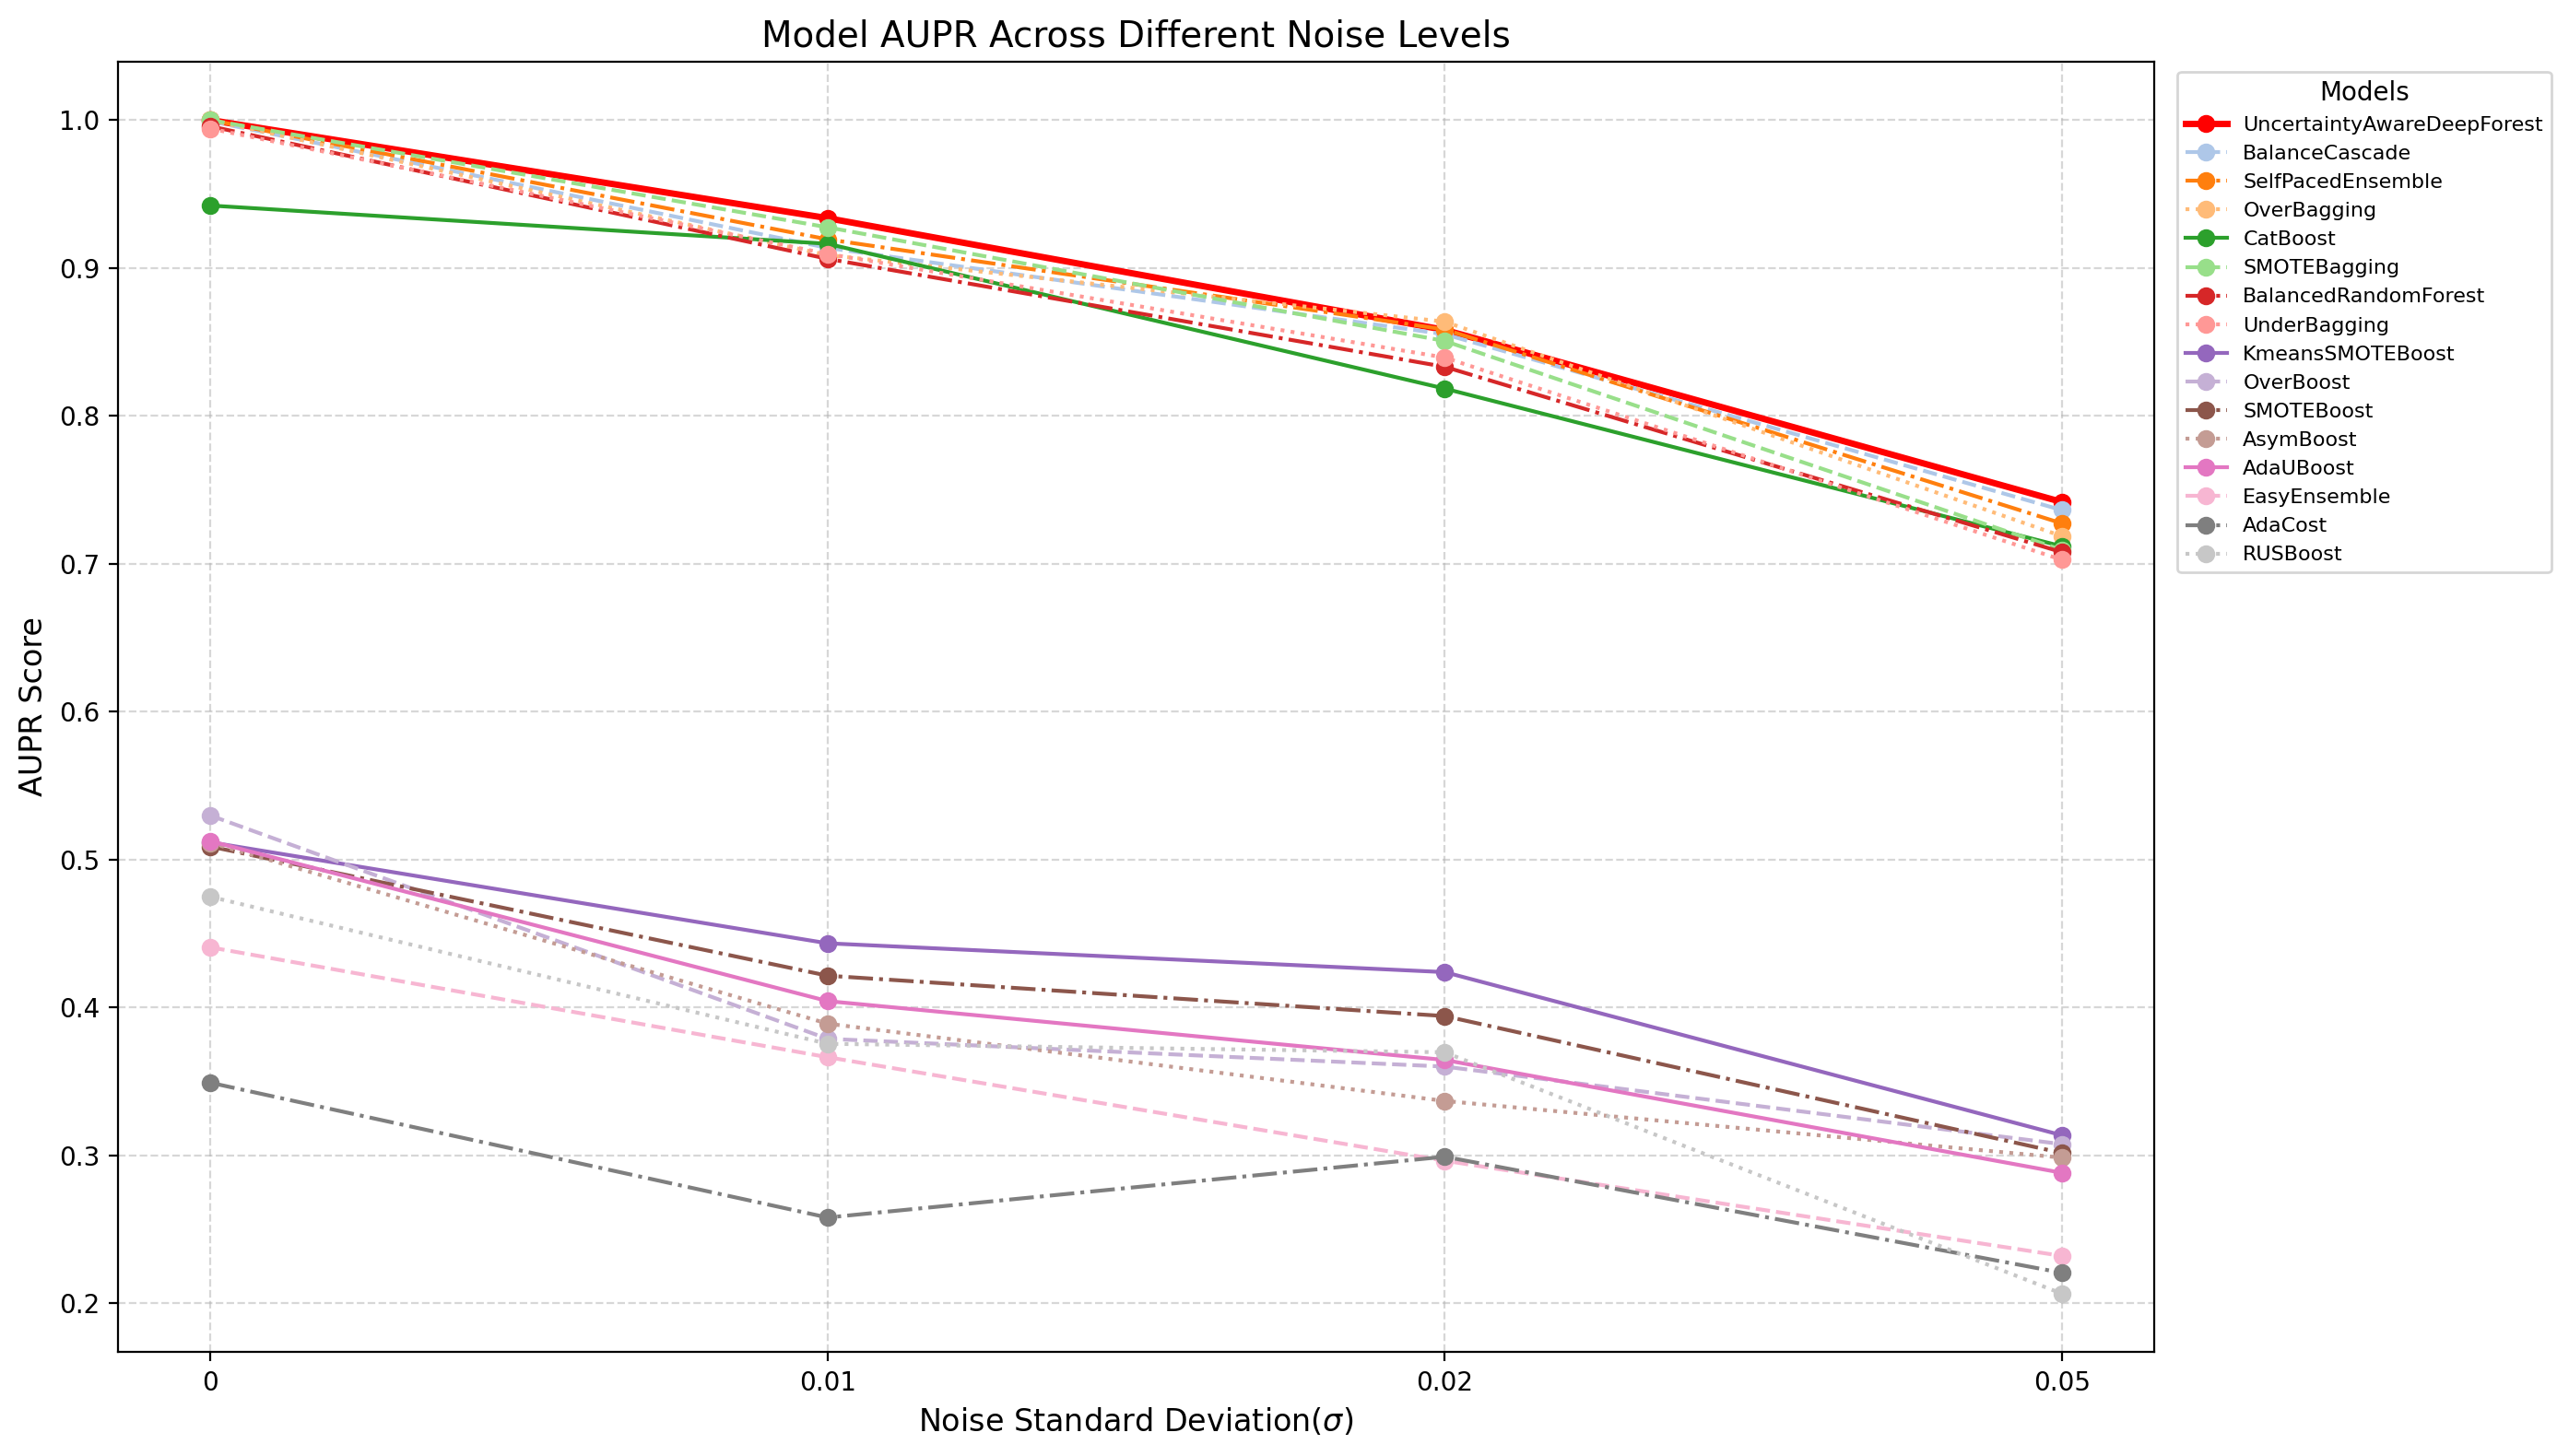

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

# 定义文件夹路径和模型
noisy_folders = ["plot2_noisy_0", "plot2_noisy_1", "plot2_noisy_2", "plot2_noisy_5"]
base_path = "./"  # 修改为实际路径
model_names = [
    "AdaCost", "AdaUBoost", "AsymBoost", "BalanceCascade", "BalancedRandomForest",
    "CatBoost", "EasyEnsemble", "KmeansSMOTEBoost", "OverBagging", "OverBoost",
    "RUSBoost", "SelfPacedEnsemble", "SMOTEBagging", "SMOTEBoost",
    "UncertaintyAwareDeepForest", "UnderBagging"
]

# 定义开关：是否展示性能比 UncertaintyAwareDeepForest 好的模型
show_better_models = True  # 设置为 True 表示展示比它好的模型

# 保存性能结果的字典
performance_results = {model: [] for model in model_names}

# 遍历每个 noisy 文件夹，包括无噪声文件夹
for folder in noisy_folders:
    folder_path = os.path.join(base_path, folder)
    targets_path = os.path.join(folder_path, "targets_test.npy")
    
    # 加载真实标签
    if not os.path.exists(targets_path):
        print(f"Warning: Missing targets file in {folder}")
        continue
    targets = np.load(targets_path)
    
    # 遍历每个模型，加载预测结果并计算性能
    for model in model_names:
        pred_file = os.path.join(folder_path, f"{model}_y_pred_proba.npy")
        if os.path.exists(pred_file):
            y_pred_proba = np.load(pred_file)
            try:
                auc = average_precision_score(targets, y_pred_proba[:, 1])
                performance_results[model].append(auc)
            except ValueError:
                performance_results[model].append(None)
        else:
            performance_results[model].append(None)

# 计算 UncertaintyAwareDeepForest 在 Noisy_5 的 AUC
uadf_auc = performance_results.get("UncertaintyAwareDeepForest", [-np.inf])[-1]

# 筛选模型
if show_better_models:
    # 展示所有模型，包括性能比 UncertaintyAwareDeepForest 好的
    filtered_performance = {
        model: scores for model, scores in performance_results.items()
        if scores[-1] is not None
    }
else:
    # 只展示性能不超过 UncertaintyAwareDeepForest 的模型
    filtered_performance = {
        model: scores for model, scores in performance_results.items()
        if scores[-1] is not None and scores[-1] <= uadf_auc
    }

# 对筛选后的模型按照 Noisy_5 AUC 排序
final_scores = [(model, scores[-1]) for model, scores in filtered_performance.items()]
sorted_models = sorted(final_scores, key=lambda x: x[1], reverse=True)

# 修改 x 轴标签为指定的值
new_x_labels = ["0", "0.01", "0.02", "0.05"]

# 绘制性能折线图
plt.figure(figsize=(14, 8), dpi=200)

# 定义颜色和线条样式
linestyles = ['-', '--', '-.', ':']
colors = plt.cm.tab20.colors  # 颜色从 tab20 调色板选取
highlight_model = "UncertaintyAwareDeepForest"

# 按排序后的顺序绘图
for i, (model, _) in enumerate(sorted_models):
    scores = performance_results[model]
    if any(score is not None for score in scores):
        valid_scores = [score if score is not None else np.nan for score in scores]
        linestyle = linestyles[i % len(linestyles)]
        color = colors[i % len(colors)]
        if model == highlight_model:
            plt.plot(new_x_labels, valid_scores, marker='o', linestyle='-', linewidth=2.5, label=model, color="red")
        else:
            plt.plot(new_x_labels, valid_scores, marker='o', linestyle=linestyle, label=model, color=color)

plt.title("Model AUPR Across Different Noise Levels", fontsize=14)
plt.xlabel("Noise Standard Deviation($\\sigma$)", fontsize=12)
plt.ylabel("AUPR Score", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)  # 添加网格线
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title="Models", fontsize=8)
plt.tight_layout()
plt.show()
